In [1533]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve, recall_score


In [1534]:
churn_data = pd.read_csv(r"D:\datascience__\end to end data sets-20230507T155014Z-001\end to end data sets\Churn_Modelling.csv")

This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [1535]:
churn_data.shape

(10000, 14)

In [1536]:
churn_data.head().T

,0,1,2,3,4
RowNumber,1,2,3,4,5
CustomerId,15634602,15647311,15619304,15701354,15737888
Surname,Hargrave,Hill,Onio,Boni,Mitchell
CreditScore,619,608,502,699,850
Geography,France,Spain,France,France,Spain
Gender,Female,Female,Female,Female,Female
Age,42,41,42,39,43
Tenure,2,1,8,1,2
Balance,0,83807.9,159661,0,125511
NumOfProducts,1,1,3,2,1


About the data:

RowNumber: Row Numbers from 1 to 10000

CustomerId: Unique Ids for bank customer identification

Surname: Customer's last name

CreditScore: Credit score of the customer

Geography: The country from which the customer belongs

Gender: Male or Female

Age: Age of the customer

Tenure: Number of years for which the customer has been with the bank

Balance: Bank balance of the customer

NumOfProducts: Number of bank products the customer is utilising

HasCrCard: Whether the customer owns a credit card or not

IsActiveMember: whether the customer is an active member or not

EstimatedSalary: Customer's estimated salary

Exited: Target variable, whether the customer has left/will continu with the bank services

In [1537]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


The data types are of 'object' or 'int' types.Let's convert them from 'object' to 'category' type.

There's no null values in the dataset.

The columns: RowNumber, CustomerId, Surname are unique to every customer and is insignificant to the data analysis process. So, let's drop them.

In [1538]:
churn_data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [1539]:
cat_cols = []
for cols in churn_data.select_dtypes("object"):
    cat_cols.append(cols)
int_cols = []
for cols in churn_data.select_dtypes(["int64", "float64"]):
    int_cols.append(cols)

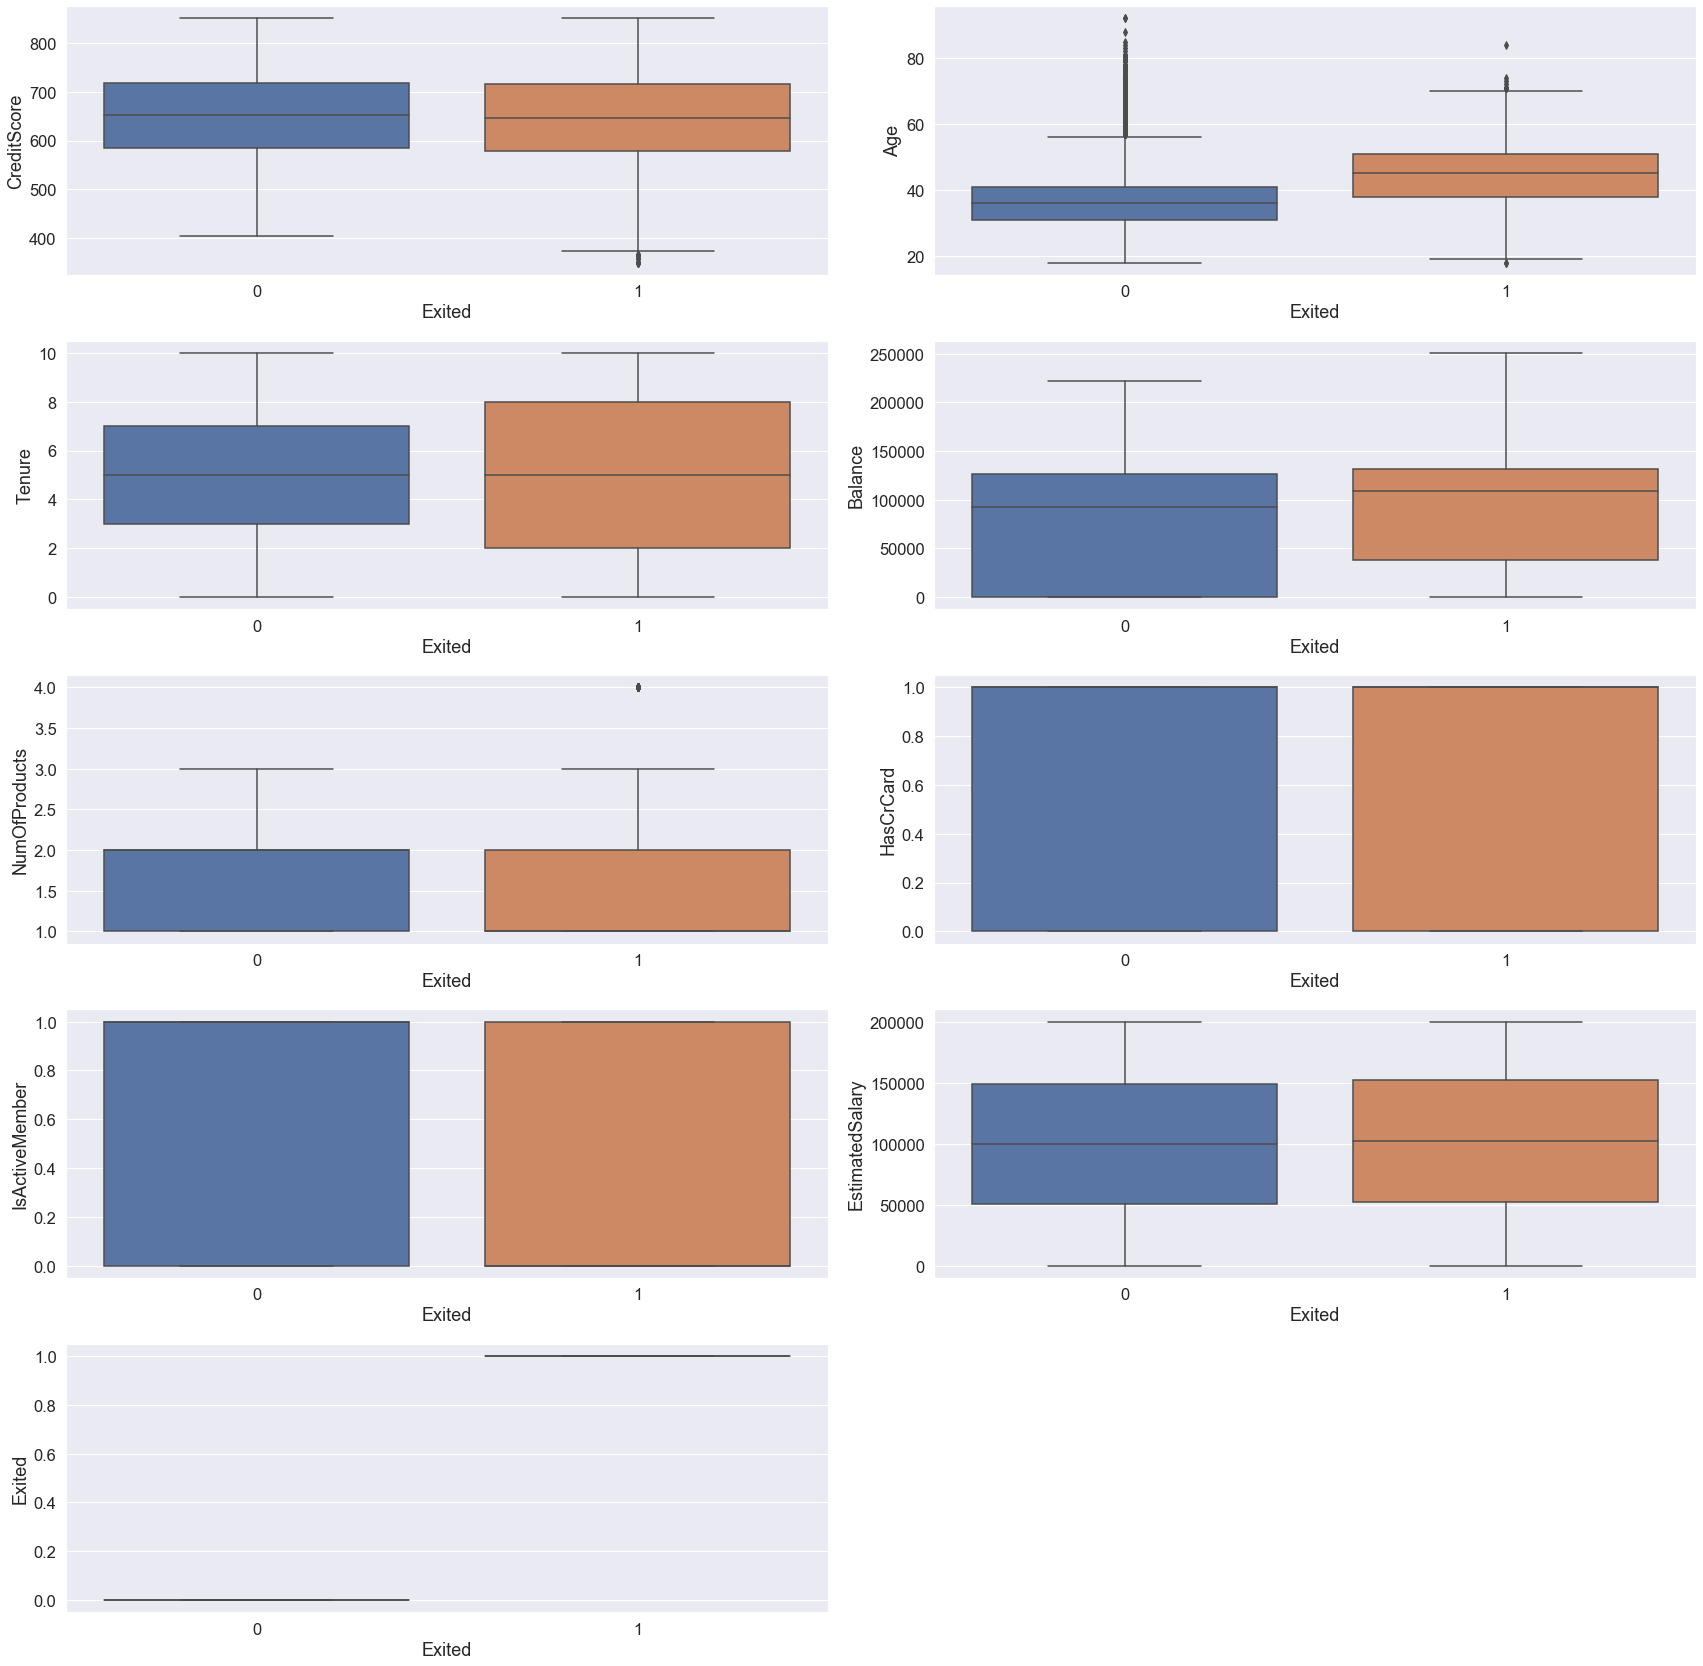

In [1540]:
#Outlier Analysis
sns.set(font_scale=1.5)
fig = plt.figure(figsize=(24,60))
i=1
for column in churn_data[int_cols]:
    plt.subplot(13,2,i)
    sns.boxplot(x=churn_data['Exited'], y=churn_data.loc[:,column])
    i=i+1
plt.tight_layout()
plt.show()

The features: CreditScore, Age, NumOfProducts have outliers but they cannot be removed as those are possible factors in real-life.

The numerical columns: 'HasCrCard','IsActiveMember','Exited' are actually bivariate numerical categorical columns. Let's change them as well.

In [1541]:
cat_cols.extend(['HasCrCard', 'IsActiveMember', 'Exited'])

In [1542]:
cat_cols

['Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [1543]:
churn_data[cat_cols] = churn_data[cat_cols].astype("category")

In [1544]:
int_cols.remove('HasCrCard')
int_cols.remove('IsActiveMember')
int_cols.remove('Exited')
int_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [1545]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  category
 8   IsActiveMember   10000 non-null  category
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  category
dtypes: category(5), float64(2), int64(4)
memory usage: 518.2 KB


In [1546]:
churn_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48


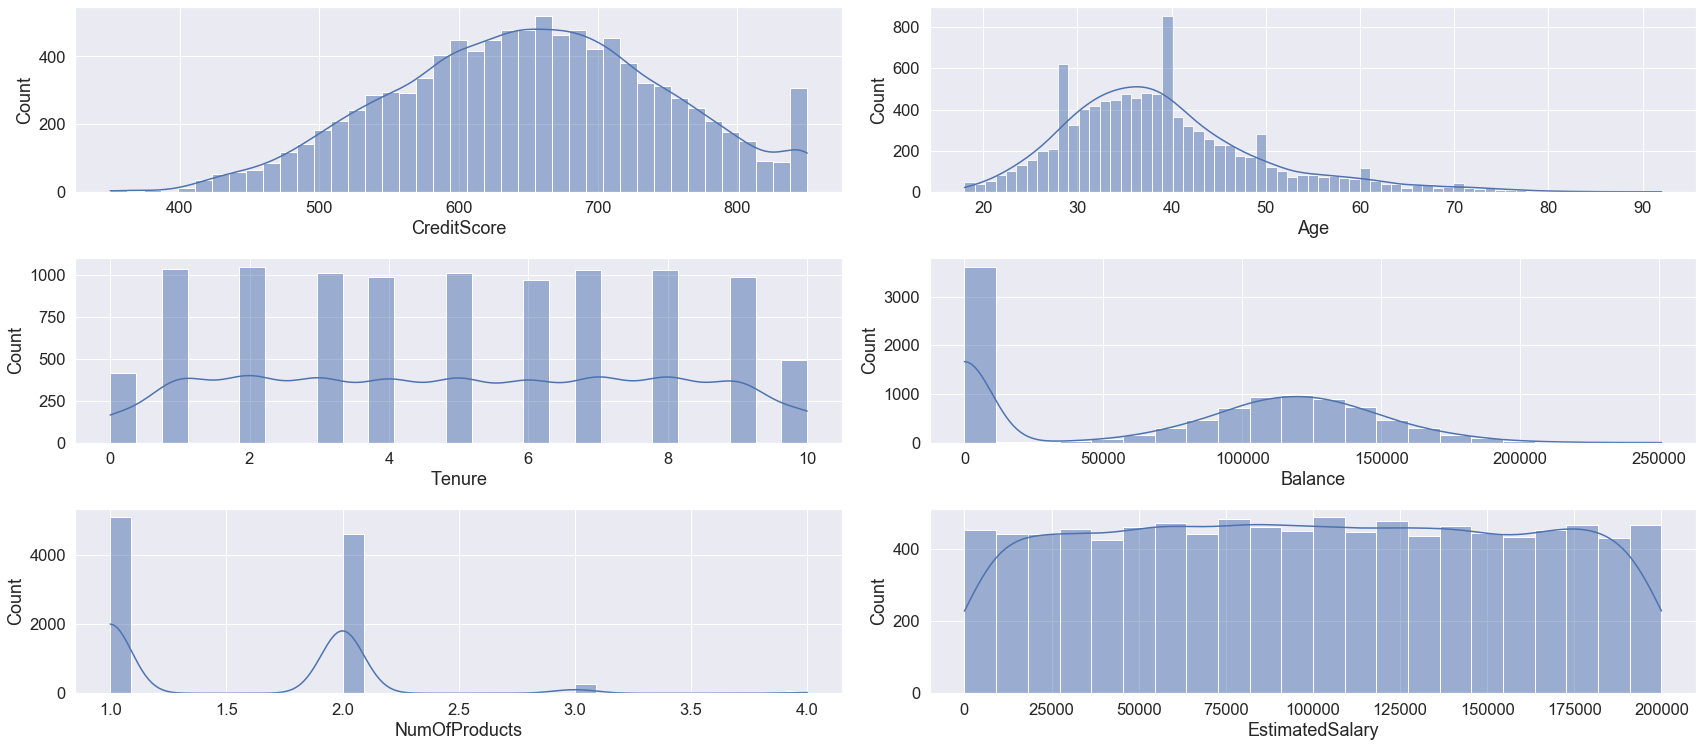

In [1547]:
#Analysing statistical distribution:
#visualising columnwise distributions
sns.set(rc = {'figure.figsize': (24,24)}, font_scale=1.5)
i = 1
for col in churn_data[int_cols].columns:
    plt.subplot(7,2,i)
    sns.histplot(data = churn_data[int_cols], x = col, kde = True)
    i = i+1
plt.tight_layout()
plt.show()

Mean CreditScore is around 60% and almost 50% of the customers fall in this category.

75% of people are in the age range below 44 years.

Average Tenure is 5 years and it is uniformly distributed.

25% of people have a Zero Balance Account.

50-75% of people are using only 1 or 2 products.

Estimated Salary of 50% of people is below 100K and it ranges upto 200K.

<Figure size 1080x432 with 0 Axes>

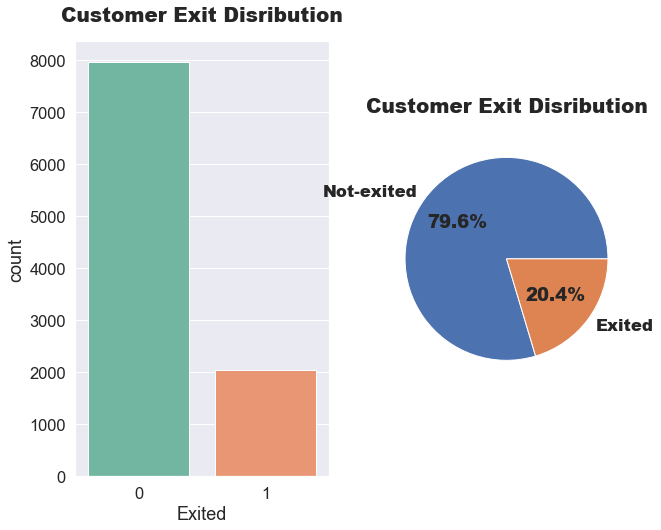

In [1548]:
#Univariate Analysis of Target Variable
count = churn_data.Exited.value_counts()
labels = 'Not-exited', 'Exited'

plt.figure(figsize=(15,6))
fig,ax = plt.subplots(figsize=(10,8))

plt.subplot(1,2,1)
sns.countplot(x ='Exited', data=churn_data, palette="Set2")
plt.title("Customer Exit Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=labels, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Customer Exit Disribution",fontweight="black",size=20,pad=20)
plt.show()

We can see that 79.6% of customers have not stopped using the bank services. Hence, a small percentage are getting churned.

<Figure size 1080x432 with 0 Axes>

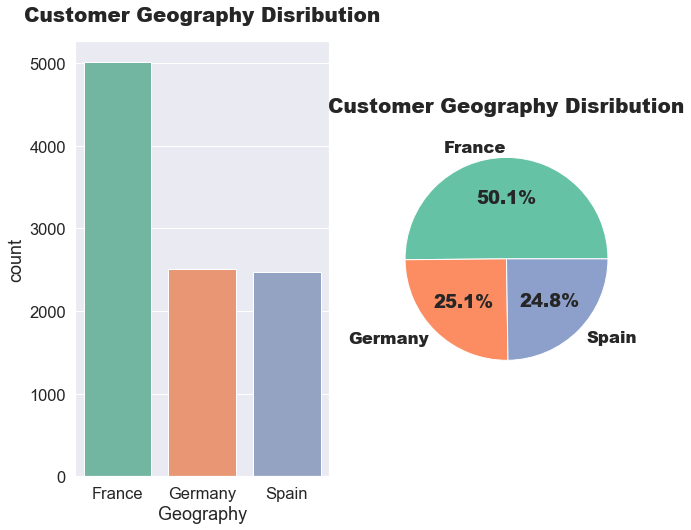

In [1549]:
#Univariate Analysis of Geography
count = churn_data.Geography.value_counts()

plt.figure(figsize=(15,6))
fig,ax = plt.subplots(figsize=(10,8))

plt.subplot(1,2,1)
sns.countplot(x ='Geography', data=churn_data, palette="Set2")
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Customer Geography Disribution",fontweight="black",size=20,pad=20)
plt.show()

50% of customers come from France and customers from Germany and Spain make up the another 50%.

<Figure size 1080x432 with 0 Axes>

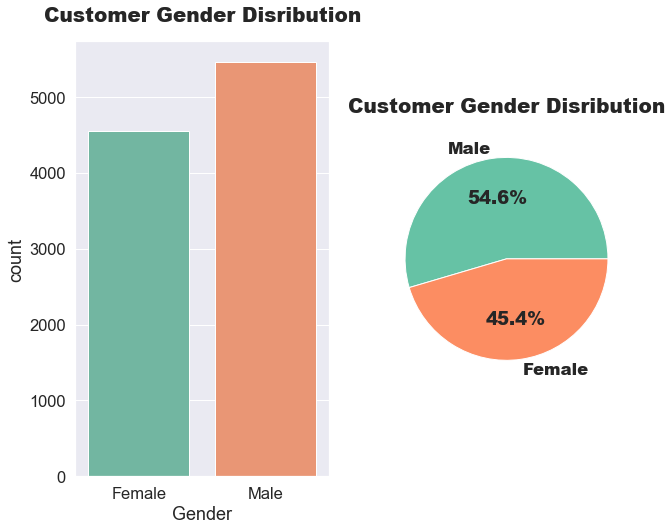

In [1550]:
#Univariate Analysis of Gender
count = churn_data.Gender.value_counts()

plt.figure(figsize=(15,6))
fig,ax = plt.subplots(figsize=(10,8))

plt.subplot(1,2,1)
sns.countplot(x ='Gender', data=churn_data, palette="Set2")
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=count.index, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Customer Gender Disribution",fontweight="black",size=20,pad=20)
plt.show()

The gender distribution is almost equal as we can see only 5% difference in the data available.

<Figure size 1080x432 with 0 Axes>

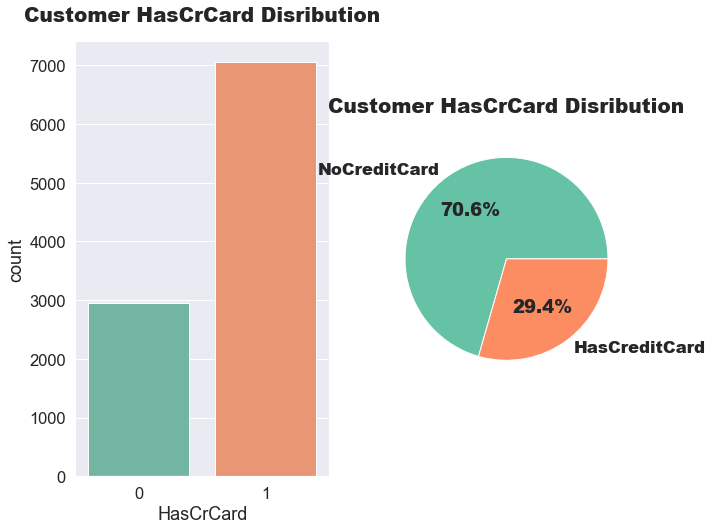

In [1551]:
#Univariate Analysis of HasCrCard
count = churn_data.HasCrCard.value_counts()
labels = 'NoCreditCard', 'HasCreditCard'

plt.figure(figsize=(15,6))
fig,ax = plt.subplots(figsize=(10,8))

plt.subplot(1,2,1)
sns.countplot(x ='HasCrCard', data=churn_data, palette="Set2")
plt.title("Customer HasCrCard Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=labels, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Customer HasCrCard Disribution",fontweight="black",size=20,pad=20)
plt.show()

Majority of customers don't have Credit Card while only 30% have it.

<Figure size 1080x432 with 0 Axes>

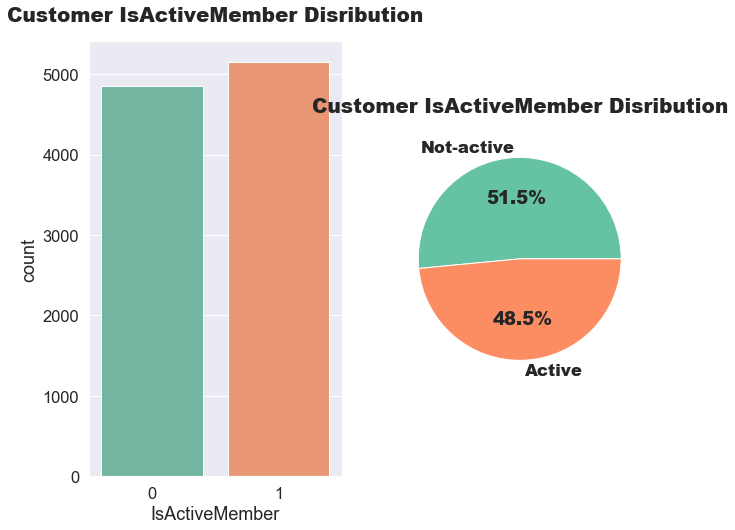

In [1552]:
#Univariate Analysis of IsActiveMember
count = churn_data.IsActiveMember.value_counts()
labels = 'Not-active', 'Active'

plt.figure(figsize=(15,6))
fig,ax = plt.subplots(figsize=(10,8))

plt.subplot(1,2,1)
sns.countplot(x ='IsActiveMember', data=churn_data, palette="Set2")
plt.title("Customer IsActiveMember Disribution",fontweight="black",size=20,pad=20)

plt.subplot(1,2,2)
plt.pie(count.values, labels=labels, autopct="%1.1f%%",colors=sns.set_palette("Set2"),
        textprops={"fontweight":"black"})
plt.title("Customer IsActiveMember Disribution",fontweight="black",size=20,pad=20)
plt.show()

Percentage of customers being an active/inactive user is around 50%.

In [1553]:
#Bi-variate Analysis
def bivariate_cat(data,col1,col2,rot):
    cross_tab = pd.crosstab(data[col1], data[col2]).apply(lambda x: x/x.sum()*100, axis=1).round(2)
    ct_exit = cross_tab[1].sort_values(ascending=False)
    ct_exit.plot.bar(figsize=(12,5))
    plt.xlabel('{}'.format(col1))
    plt.ylabel('% of exit churn among customers'.format(col1))
    plt.title('{} Vs attrition rate'.format(col1))
    plt.xticks(rotation=rot)
    plt.show()
    return ct_exit

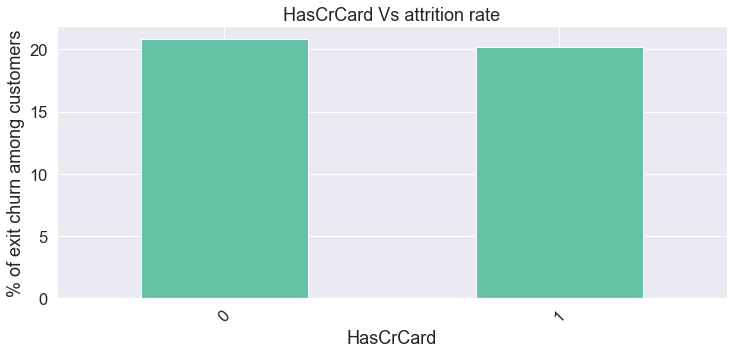

HasCrCard
0    20.81
1    20.18
Name: 1, dtype: float64

In [1554]:
#Relationship between 'HasCrCard' and target variable 'Exited'
bivariate_cat(churn_data, 'HasCrCard', 'Exited', 45)

Customers without credit cards have slightly higher chance of exiting than those who own credit cards. But, it doesn't seem to be a good factor for decing the exit churn.

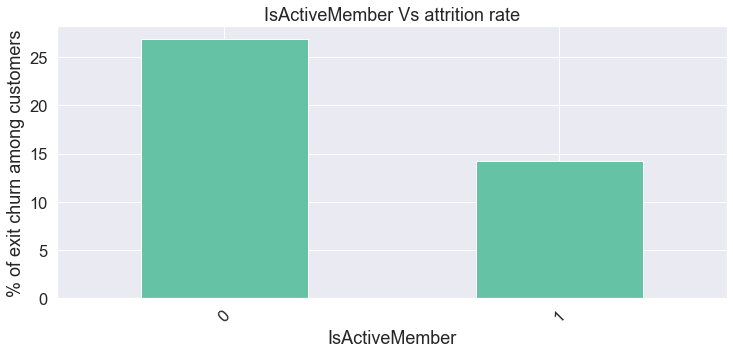

IsActiveMember
0    26.85
1    14.27
Name: 1, dtype: float64

In [1555]:
#Relationship between 'IsActiveMember' and target variable 'Exited'
bivariate_cat(churn_data, 'IsActiveMember', 'Exited', 45)

Inactive customers has a higher exit churn rate than the active members.

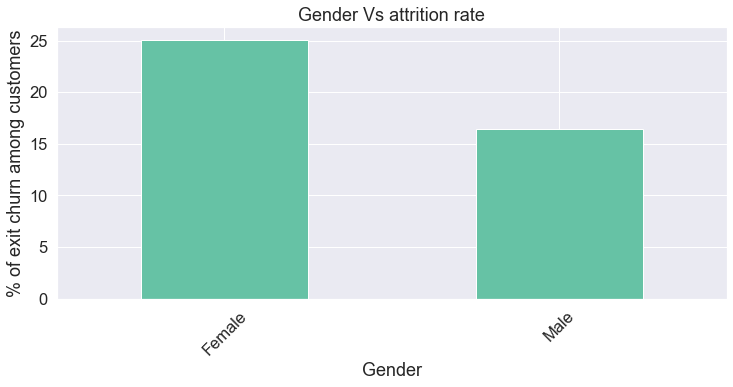

Gender
Female    25.07
Male      16.46
Name: 1, dtype: float64

In [1556]:
#Relationship between 'Gender' and target variable 'Exited'
bivariate_cat(churn_data, 'Gender', 'Exited', 45)

Female customers are exiting by a greater margin than their male counterparts.

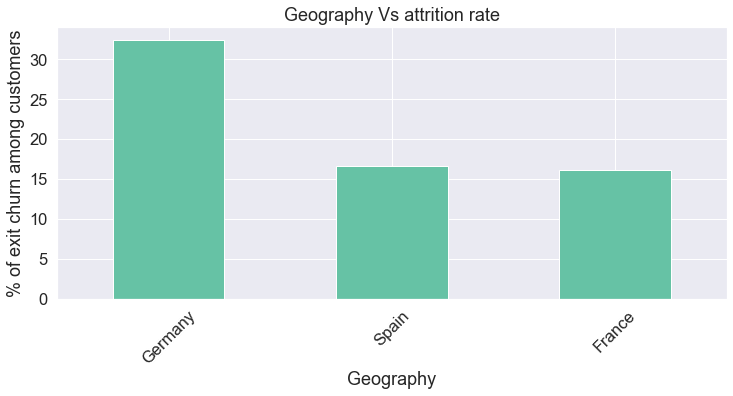

Geography
Germany    32.44
Spain      16.67
France     16.15
Name: 1, dtype: float64

In [1557]:
#Relationship between 'Geography' and target variable 'Exited'
bivariate_cat(churn_data, 'Geography', 'Exited', 45)

Customers from Germany have double the exit churn than the other 2 countries.

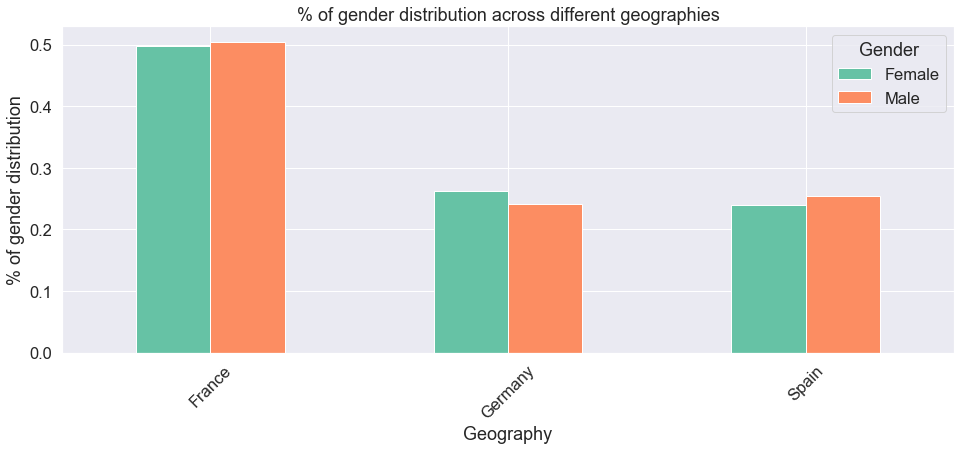

Gender       Female      Male
Geography                    
France     0.497689  0.504490
Germany    0.262602  0.241158
Spain      0.239709  0.254352


In [1558]:
#Relationship between 'Geography' and 'Gender'
result_df = pd.crosstab(churn_data["Geography"], churn_data["Gender"], margins=True).drop(columns='All')
result_df = result_df.div(result_df.loc['All'])
result_df.drop(index='All', inplace=True)
ct_geo_gender = result_df

ct_geo_gender.plot.bar(figsize=(16,6))
plt.xlabel("Geography")
plt.xticks(rotation=45)
plt.ylabel('% of gender distribution')
plt.title("% of gender distribution across different geographies")
plt.show()
print(ct_geo_gender)

Germany has more female customers and previously we have seen that females exit churn is higher, and this has led to exit churn for germany being highest.

In [1559]:
#chi-square relationship among categorical features

from scipy.stats import chi2_contingency

In [1560]:
chi2, p_values = [], []
for f in cat_cols:
    chitest = chi2_contingency(pd.crosstab(churn_data[f], churn_data['Exited']))
    p_values.append(np.round(chitest[1],6))

chi_results = pd.DataFrame(p_values, index=cat_cols)

In [1561]:
chi_results

,0
Geography,0.000000
Gender,0.000000
HasCrCard,0.492372
IsActiveMember,0.000000
Exited,0.000000


From the above result, we observe that the feature 'HasCrCard' has p-value >0.05 and is dependent variable. Hence, we can drop it.

In [1562]:
churn_data = churn_data.drop("HasCrCard", axis=1)

In [1563]:
churn_data.shape

(10000, 10)

In [1564]:
int_cols

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [1565]:
min(churn_data['CreditScore']), max(churn_data['CreditScore'])

(350, 850)

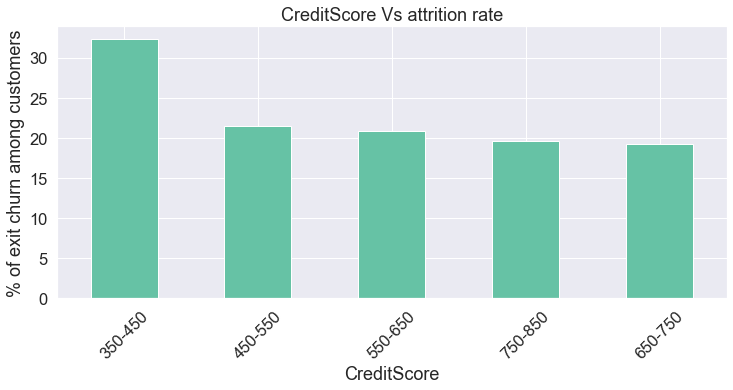

CreditScore
350-450    32.28
450-550    21.44
550-650    20.78
750-850    19.59
650-750    19.25
Name: 1, dtype: float64

In [1566]:
#bin CreditScore
churn_data['CreditScore'] = pd.cut(churn_data.CreditScore.to_list(), bins=[350,450,550,650,750,850], labels=['350-450','450-550','550-650','650-750','750-850'], include_lowest=True)
bivariate_cat(churn_data, 'CreditScore', 'Exited', 45)

In [1567]:
min(churn_data['Age']), max(churn_data['Age'])

(18, 92)

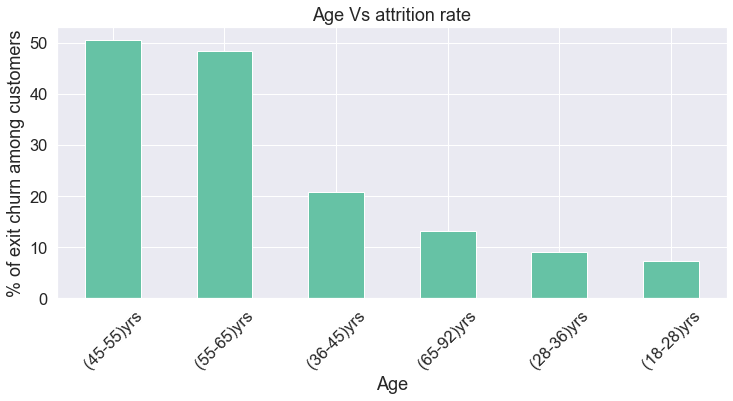

Age
(45-55)yrs    50.57
(55-65)yrs    48.32
(36-45)yrs    20.73
(65-92)yrs    13.26
(28-36)yrs     9.17
(18-28)yrs     7.42
Name: 1, dtype: float64

In [1568]:
#bin Age
churn_data['Age'] = pd.cut(churn_data.Age.to_list(), bins=[18,28,36,45,55,65,92], labels=['(18-28)yrs','(28-36)yrs','(36-45)yrs','(45-55)yrs','(55-65)yrs','(65-92)yrs'], include_lowest=True)
bivariate_cat(churn_data, 'Age', 'Exited', 45)

In [1569]:
min(churn_data['Tenure']), max(churn_data['Tenure'])

(0, 10)

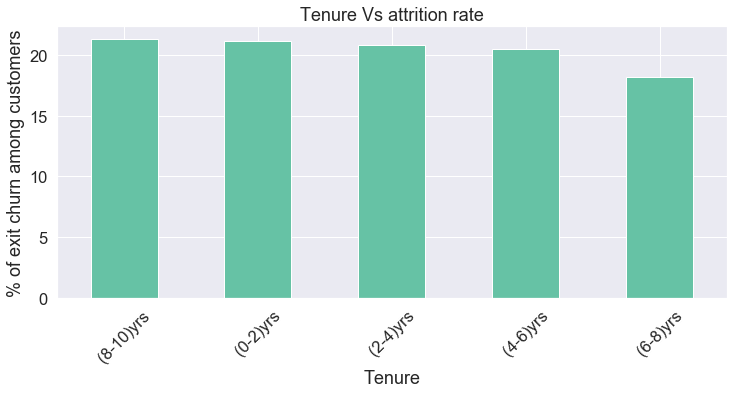

Tenure
(8-10)yrs    21.30
(0-2)yrs     21.15
(2-4)yrs     20.82
(4-6)yrs     20.46
(6-8)yrs     18.22
Name: 1, dtype: float64

In [1570]:
#bin Tenure
churn_data['Tenure'] = pd.cut(churn_data.Tenure.to_numpy(), bins=[0,2,4,6,8,10], labels=['(0-2)yrs','(2-4)yrs','(4-6)yrs','(6-8)yrs','(8-10)yrs'], include_lowest=True)
bivariate_cat(churn_data, 'Tenure', 'Exited', 45)

In [1571]:
min(churn_data['Balance']), max(churn_data['Balance'])

(0.0, 250898.09)

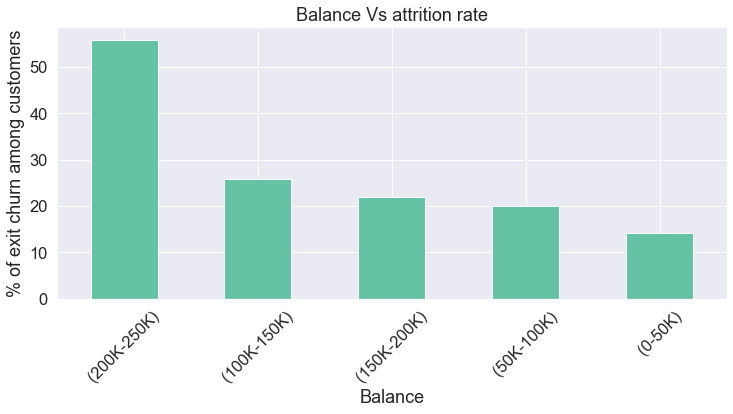

Balance
(200K-250K)    55.88
(100K-150K)    25.77
(150K-200K)    21.93
(50K-100K)     19.88
(0-50K)        14.25
Name: 1, dtype: float64

In [1572]:
#bin Balance
churn_data['Balance'] = pd.cut(churn_data.Balance.to_numpy(), bins=[0.0,50000.0,100000.0,150000.0,200000.0,250898.09], labels=['(0-50K)','(50K-100K)','(100K-150K)','(150K-200K)','(200K-250K)'], include_lowest=True)
bivariate_cat(churn_data, 'Balance', 'Exited', 45)

In [1573]:
min(churn_data['NumOfProducts']), max(churn_data['NumOfProducts'])

(1, 4)

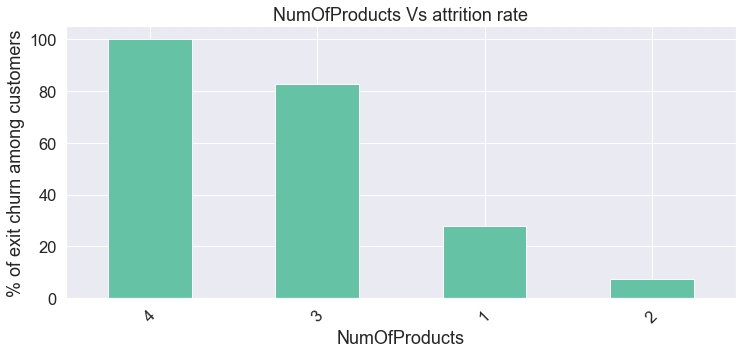

NumOfProducts
4    100.00
3     82.71
1     27.71
2      7.58
Name: 1, dtype: float64

In [1574]:
#bin NumOfProducts
churn_data['NumOfProducts'] = pd.cut(churn_data.NumOfProducts.to_list(), bins=[0,1,2,3,4], labels=['1','2','3','4'])
bivariate_cat(churn_data, 'NumOfProducts', 'Exited', 45)

In [1575]:
min(churn_data['EstimatedSalary']), max(churn_data['EstimatedSalary'])

(11.58, 199992.48)

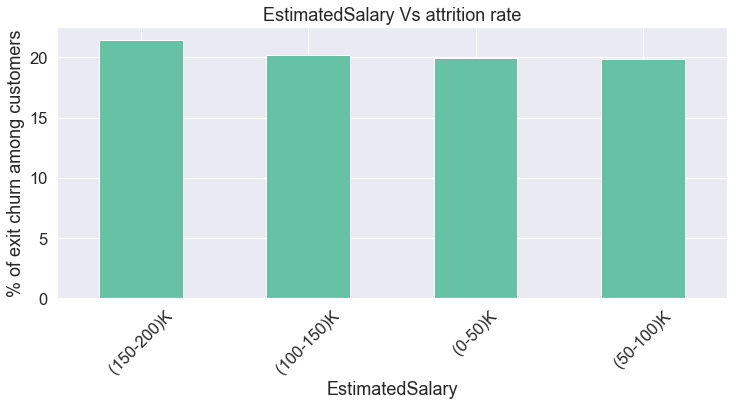

EstimatedSalary
(150-200)K    21.47
(100-150)K    20.23
(0-50)K       19.93
(50-100)K     19.87
Name: 1, dtype: float64

In [1576]:
#bin EstimatedSalary
churn_data['EstimatedSalary'] = pd.cut(churn_data.EstimatedSalary.to_list(), bins=[11.58,50000.0,100000.0,150000.0,199992.48], labels=['(0-50)K','(50-100)K','(100-150)K','(150-200)K'], include_lowest=True)
bivariate_cat(churn_data, 'EstimatedSalary', 'Exited', 45)

In [1577]:
#chi-square relationship among numerical features
chi2, p_values = [], []
for f in int_cols:
    chitest = chi2_contingency(pd.crosstab(churn_data[f], churn_data['Exited']))
    p_values.append(np.round(chitest[1],6))

chi_results = pd.DataFrame(p_values, index=int_cols)

In [1578]:
chi_results

,0
CreditScore,0.000296
Age,0.000000
Tenure,0.096740
Balance,0.000000
NumOfProducts,0.000000
EstimatedSalary,0.469551


Observing the chi-square test results, we find p-values of Tenure and EstimatedSalary to be greater than 0.05. Let's remove these two to reduce dependencies among variables

In [1579]:
churn_data = churn_data.drop(["Tenure","EstimatedSalary"], axis=1)
#churn_data = churn_data.drop(["Tenure"], axis=1)

In [1580]:
churn_data.shape

(10000, 8)

In [1581]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,550-650,France,Female,(36-45)yrs,(0-50K),1,1,1
1,550-650,Spain,Female,(36-45)yrs,(50K-100K),1,1,0
2,450-550,France,Female,(36-45)yrs,(150K-200K),3,0,1
3,650-750,France,Female,(36-45)yrs,(0-50K),2,0,0
4,750-850,Spain,Female,(36-45)yrs,(100K-150K),1,1,0


In [1582]:
churn_data.isnull().sum()

CreditScore       0
Geography         0
Gender            0
Age               0
Balance           0
NumOfProducts     0
IsActiveMember    0
Exited            0
dtype: int64

In [1583]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   CreditScore     10000 non-null  category
 1   Geography       10000 non-null  category
 2   Gender          10000 non-null  category
 3   Age             10000 non-null  category
 4   Balance         10000 non-null  category
 5   NumOfProducts   10000 non-null  category
 6   IsActiveMember  10000 non-null  category
 7   Exited          10000 non-null  category
dtypes: category(8)
memory usage: 79.4 KB


In [1584]:
#scaling up features
from sklearn.preprocessing import LabelEncoder

#target column
tgt_col = ['Exited']

#categorical columns
category_names = churn_data.nunique()[churn_data.nunique() < 15].keys().tolist()
category_names = [x for x in category_names if x not in tgt_col]

#numerical columns
num_cols = [i for i in churn_data.columns if i not in category_names+tgt_col]

#binary columns
bin_cols = churn_data.nunique()[churn_data.nunique()==2].keys().tolist()

#multi-columns
multi_cols = [i for i in category_names if i not in bin_cols]

#Label Encoding Binary columns
le = LabelEncoder()
for i in bin_cols:
    churn_data[i] = le.fit_transform(churn_data[i])

#duplicating cols for multi-value columns
churn_data = pd.get_dummies(data=churn_data, columns=multi_cols)

In [1585]:
churn_data.head().T

,0,1,2,3,4
Gender,0,0,0,0,0
IsActiveMember,1,1,0,0,1
Exited,1,0,1,0,0
CreditScore_350-450,0,0,0,0,0
CreditScore_450-550,0,0,1,0,0
CreditScore_550-650,1,1,0,0,0
CreditScore_650-750,0,0,0,1,0
CreditScore_750-850,0,0,0,0,1
Geography_France,1,0,1,1,0
Geography_Germany,0,0,0,0,0


In [1586]:
num_cols

[]

In [1587]:
#Normalising Numerical columns
#from sklearn.preprocessing import MinMaxScaler
#minmax = MinMaxScaler()
#churn_data[num_cols] = minmax.fit_transform(churn_data[num_cols].values)

In [1588]:
#Model Building
X = churn_data.drop(columns='Exited').copy()
Y = pd.DataFrame(churn_data['Exited'])

In [1589]:
#Logistic Regression using Statsmodel
import statsmodels.api as sm
model = sm.Logit(Y,X)
result = model.fit()
result.summary()

         Current function value: 0.352414
         Iterations: 35


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9979
Method:                           MLE   Df Model:                           20
Date:                Sun, 21 May 2023   Pseudo R-squ.:                  0.3028
Time:                        16:28:30   Log-Likelihood:                -3524.1
converged:                      False   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
Gender                 -0.5175      0.061     -8.506      0.000      -0.637      -0.398
IsActiveMember         -1.0007      0.064    -15.736      0.000      -1.125      -0.876
CreditScore_350-450     1.5883   4.29e+06    3.7e-07      1.000    -8.4e+06     8.4e+06
CreditScore_450-550     1.0303   4.28e+06   2.41e-07      1.000    -8.4e+06     8.4e+06
CreditScore_550-650     0.9800   4.36e+06   2.25e-07      1.000   -8.55e+06    8.55e+06
CreditScore_650-750     0.9505   4.29e+06   2.22e-07      1.000    -8.4e+06     8.4e+06
CreditScore_750-850     0.9274   4.25e+06   2.18e-07      1.000   -8.33e+06    8.33e+06
Geography_France        1.4766        nan        nan        nan         nan         nan
Geography_Germany       2.4709        nan        nan        nan         nan         nan
Geography_Spain         1.5289        nan        nan        nan         nan         nan
Age_(18-28)yrs         -0.3451   2.16e+06   -1.6e-07      1.000   -4.23e+06    4.23e+06
Age_(28-36)yrs         -0.1214   2.22e+06  -5.46e-08      1.000   -4.36e+06    4.36e+06
Age_(36-45)yrs          0.7892   2.18e+06   3.62e-07      1.000   -4.27e+06    4.27e+06
Age_(45-55)yrs          2.2155   2.19e+06   1.01e-06      1.000   -4.29e+06    4.29e+06
Age_(55-65)yrs          2.3594   1.93e+06   1.22e-06      1.000   -3.78e+06    3.78e+06
Age_(65-92)yrs          0.5788   1.54e+06   3.77e-07      1.000   -3.01e+06    3.01e+06
Balance_(0-50K)         0.9220        nan        nan        nan         nan         nan
Balance_(50K-100K)      0.5160        nan        nan        nan         nan         nan
Balance_(100K-150K)     0.7701        nan        nan        nan         nan         nan
Balance_(150K-200K)     0.6810        nan        nan        nan         nan         nan
Balance_(200K-250K)     2.5873        nan        nan        nan         nan         nan
NumOfProducts_1        -4.6048        nan        nan        nan         nan         nan
NumOfProducts_2        -6.1634        nan        nan        nan         nan         nan
NumOfProducts_3        -2.0110        nan        nan        nan         nan         nan
NumOfProducts_4        18.2557        nan        nan        nan         nan         nan
=======================================================================================
"""

In [1590]:
#Logistic Regression Using sklearn

#train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=0)

#initialise the model
logReg = LogisticRegression()

#traing the model
logReg.fit(X_train, Y_train)

#predict labels for test data
y_train_pred = logReg.predict(X_train)
y_test_pred = logReg.predict(X_test)

#predict probabilities
y_train_pred_prob = logReg.predict_proba(X_train)
y_test_pred_prob = logReg.predict_proba(X_test)

In [1591]:
#Model Evaluation
score = logReg.score(X_train,Y_train)
print("Accuracy score on train data: ", score.round(2))

score = logReg.score(X_test,Y_test)
print("Accuracy score on test data: ", score.round(2))

Accuracy score on train data:  0.86
Accuracy score on test data:  0.85


In [1592]:
#classification Report
print("Train Classification Report")
print(classification_report(Y_train,y_train_pred))

print("\n")

print("Test Classification Report")
print(classification_report(Y_test,y_test_pred))

Train Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.91      5574
           1       0.73      0.47      0.57      1426

    accuracy                           0.86      7000
   macro avg       0.80      0.71      0.74      7000
weighted avg       0.85      0.86      0.84      7000



Test Classification Report
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2389
           1       0.71      0.44      0.54       611

    accuracy                           0.85      3000
   macro avg       0.79      0.70      0.73      3000
weighted avg       0.84      0.85      0.84      3000



In [1593]:
#Confusion Matrix
cm_train = confusion_matrix(Y_train, y_train_pred)
print(cm_train)

[[5329  245]
 [ 760  666]]


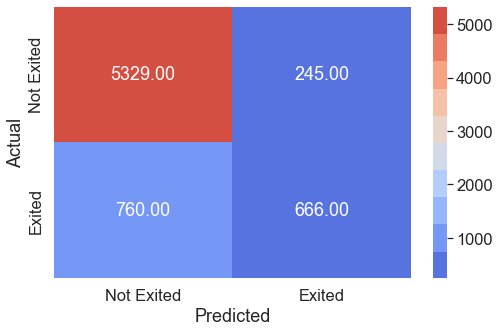

In [1594]:
plt.figure(figsize=(8,5))

sns.heatmap(cm_train, annot=True, fmt='.2f', annot_kws={'fontsize':18}, xticklabels=['Not Exited', 'Exited'], yticklabels=['Not Exited', 'Exited'], cmap=sns.color_palette("coolwarm",10))
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Area under the ROC Curve: %f 0.8420567124689743


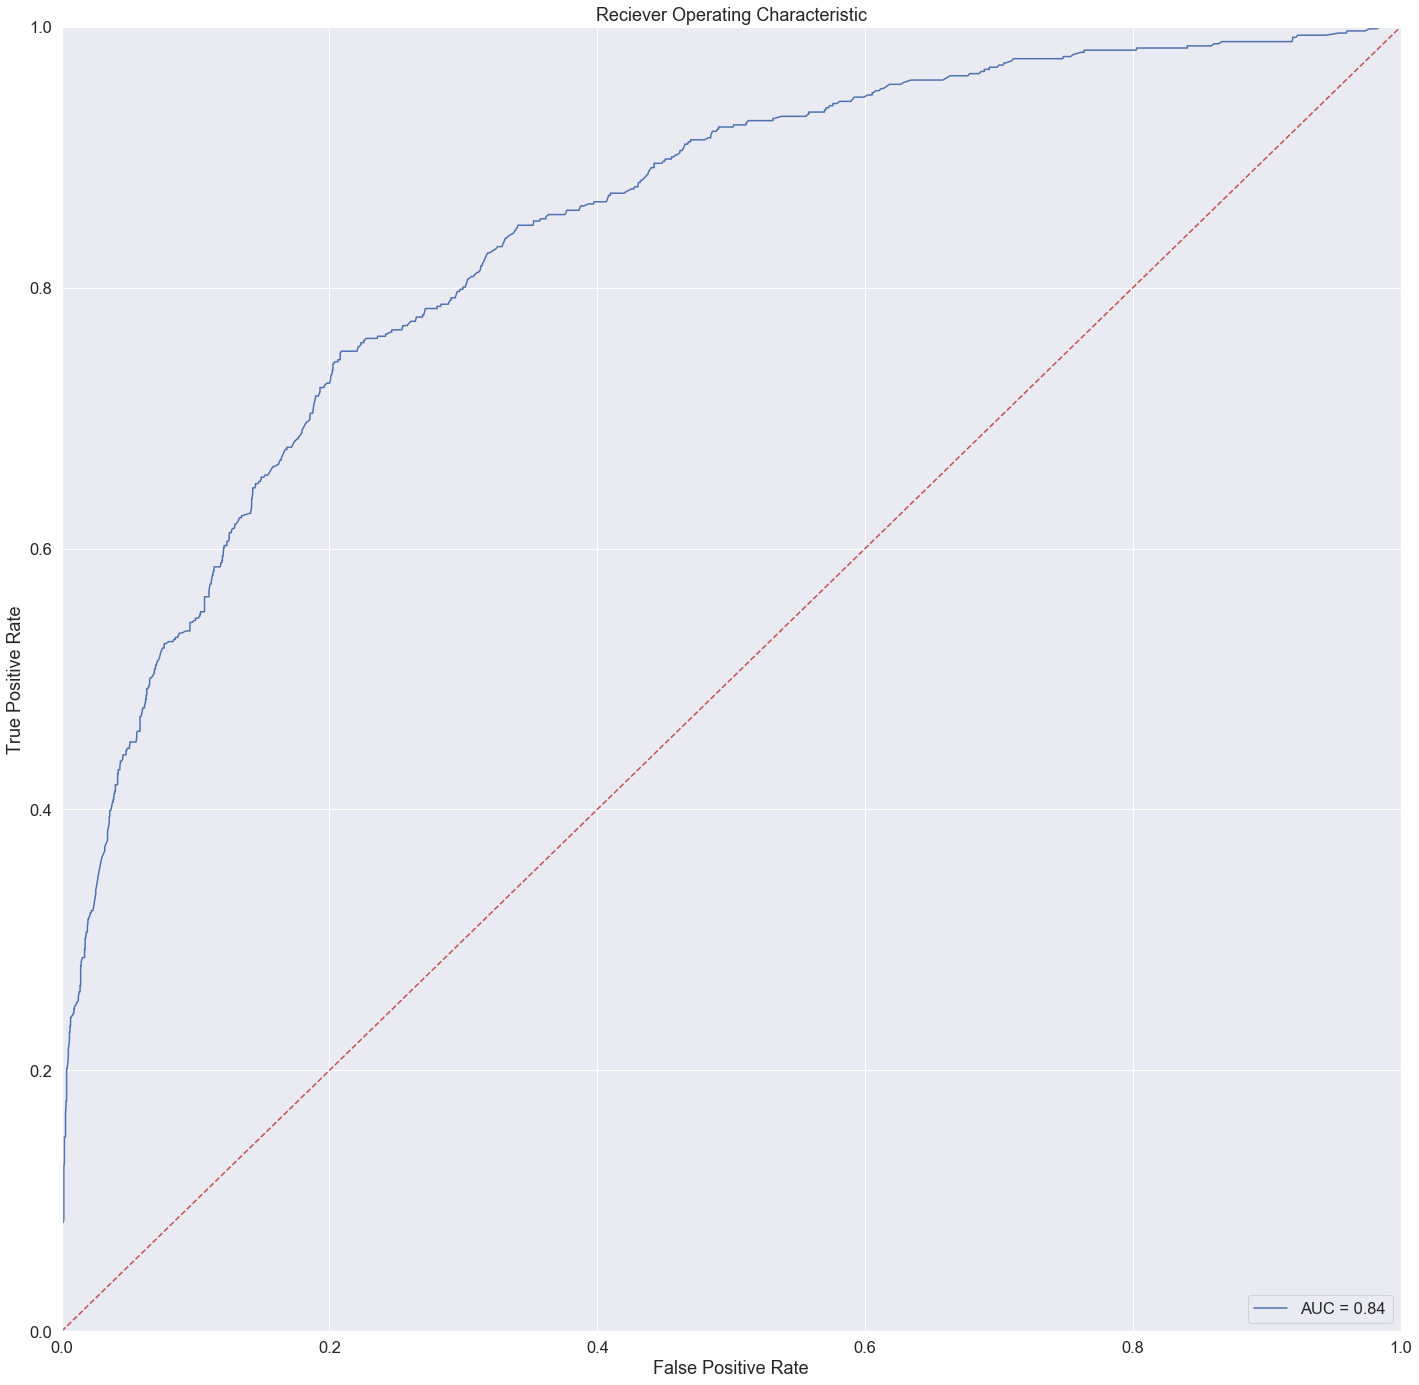

In [1595]:
#ROC Curve for Logistic Regression
from sklearn.metrics import roc_curve, auc

fpr,tpr,thresholds = roc_curve(Y_test, y_test_pred_prob[:,1], drop_intermediate=True)
roc_auc = auc(fpr,tpr)
print("Area under the ROC Curve: %f", roc_auc)

plt.title('Reciever Operating Characteristic')
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

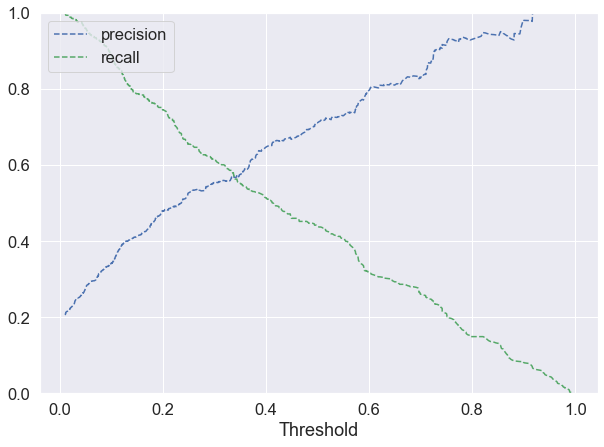

In [1596]:
#Precision-Recall Curve
precisions_lg, recalls_lg, thresholds_lg = precision_recall_curve(Y_test, y_test_pred_prob[:,1])

plt.figure(figsize=(10,7))
plt.plot(thresholds_lg, precisions_lg[:-1], 'b--', label='precision')
plt.plot(thresholds_lg, recalls_lg[:-1], 'g--', label='recall')
plt.xlabel('Threshold')
plt.legend(loc='upper left')
plt.ylim([0,1])
plt.show()